In [1]:
import numpy as np
import pandas as pd

# set the max number of columns to display
pd.options.display.max_columns = 98

# Analisi

## Obiettivo dell'analisi

Questa analisi ha come obiettivi:

1. analizzare la distribuzione dei costi per i servizi erogati a livello di regione/provincia normalizzato per numero di contribuenti
2. analizzare la distribuzione del reddito a livello di regione/provincia normalizzato per numero di contribuenti
3. ordinare le regioni e top/last province per differenza tra i costi totali dei servizi e il reddito totale
4. estrarre i top/last comuni per differenza tra i costi totali dei servizi e il reddito totale
5. per i top/last comuni (province) analizzare la distribuzione dei costi per i vari servizi e dei redditi per fascia


## Attributi

**OpenCivitas, Costi Servizi** 

- ANNO
- COMUNE_CAT_COD: codice comune
- SPESA_CCC_FC01A: costo riscossione tributi
- SPESA_CCC_FC01B: costo ufficio tecnico
- SPESA_CCC_FC01C: costo anagrafe, stato civile, leva e servizio statistico
- SPESA_CCC_FC01D: costo altri servizi generali
- SPESA_CCC_FC02U: costo polizia locale
- SPESA_CCC_FC03U: costo istruzione pubblica
- SPESA_CCC_FC04A: costo viabilita'
- SPESA_CCC_FC04B: costo trasporto pubblico e servizi connessi
- SPESA_CCC_FC05A: costo gestione del territorio
- SPESA_CCC_FC05B: costo ambiente
- SPESA_CCC_FC06A: costo settore sociale
- SPESA_CCC_FC06B: costo asili nido

**Data Demografici**

- cod istat
- cod cat
- cod catasto
- ...

**MEF Irpef**

- Numero contribuenti
- Reddito da fabbricati
- Reddito da lavoro dipendente e assimilati
- Reddito da pensione
- Reddito da lavoro autonomo (compresi nulli)
- Reddito spettanza imprenditore ordinaria (compresi nulli)
- Reddito spettanza imprenditore semplificata (compresi nulli)
- Reddito da partecipazione (compresi nulli)
- Reddito imponibile, Imposta netta
- Reddito imponibile addizionale
- Addizionale regionale dovuta
- Addizionale comunale dovuta
- Reddito complessivo minore o uguale a zero euro
- Reddito complessivo da 0 a 10000 euro
- Reddito complessivo da 10000 a 15000 euro
- Reddito complessivo da 15000 a 26000 euro
- Reddito complessivo da 26000 a 55000 euro
- Reddito complessivo da 55000 a 75000 euro
- Reddito complessivo da 75000 a 120000 euro
- Reddito complessivo oltre 120000 euro

In [2]:
df_sose = pd.read_csv('./data/opencivitas_spesa_storica_dati_irpef.csv')
df_sose[df_sose['Numero contribuenti'] > 0].head()

,ANNO,COMUNE_CAT_COD,SPESA_CCC_FC01A,TOT_SPESA_CCC_FC01A,SPESA_CCC_FC01B,TOT_SPESA_CCC_FC01B,SPESA_CCC_FC01C,TOT_SPESA_CCC_FC01C,SPESA_CCC_FC01D,TOT_SPESA_CCC_FC01D,SPESA_CCC_FC02U,TOT_SPESA_CCC_FC02U,SPESA_CCC_FC03U,TOT_SPESA_CCC_FC03U,SPESA_CCC_FC04A,TOT_SPESA_CCC_FC04A,SPESA_CCC_FC04B,TOT_SPESA_CCC_FC04B,SPESA_CCC_FC05A,TOT_SPESA_CCC_FC05A,SPESA_CCC_FC05B,TOT_SPESA_CCC_FC05B,SPESA_CCC_FC06A,TOT_SPESA_CCC_FC06A,SPESA_CCC_FC06B,TOT_SPESA_CCC_FC06B,SPESA_CCC_tot,TOT_SPESA_CCC_tot,Codice Nazionale,Denominazione Italiana,Codice Catastale,Ufficio Catasto Terreni,Ufficio Catasto Fabbricati,Codice Conservatoria,Addizionale comunale dovuta Ammontare,Addizionale comunale dovuta Frequenza,Addizionale regionale dovuta Ammontare,Addizionale regionale dovuta Frequenza,Anno di imposta,Codice Istat Comune,Codice Istat Regione,Codice catastale,Denominazione Comune,Imposta netta Ammontare,Imposta netta Frequenza,Numero contribuenti,Reddito complessivo da 0 a 10000 euro Ammontare,Reddito complessivo da 0 a 10000 euro Frequenza,Reddito complessivo da 10000 a 15000 euro Ammontare,Reddito complessivo da 10000 a 15000 euro Frequenza,Reddito complessivo da 15000 a 26000 euro Ammontare,Reddito complessivo da 15000 a 26000 euro Frequenza,Reddito complessivo da 26000 a 55000 euro Ammontare,Reddito complessivo da 26000 a 55000 euro Frequenza,Reddito complessivo da 55000 a 75000 euro Ammontare,Reddito complessivo da 55000 a 75000 euro Frequenza,Reddito complessivo da 75000 a 120000 euro Ammontare,Reddito complessivo da 75000 a 120000 euro Frequenza,Reddito complessivo minore di zero euro Ammontare,Reddito complessivo minore di zero euro Frequenza,Reddito complessivo minore o uguale a zero euro Ammontare,Reddito complessivo minore o uguale a zero euro Frequenza,Reddito complessivo oltre 120000 euro Ammontare,Reddito complessivo oltre 120000 euro Frequenza,Reddito da fabbricati Ammontare,Reddito da fabbricati Frequenza,Reddito da lavoro dipendente e assimilati Ammontare,Reddito da lavoro dipendente e assimilati Frequenza,Reddito da pensione Ammontare,Reddito da pensione Frequenza,Reddito imponibile Ammontare,Reddito imponibile Frequenza,Reddito imponibile addizionale Ammontare,Reddito imponibile addizionale Frequenza,Reddito imponibile addizionale IRPEF Ammontare,Reddito imponibile addizionale IRPEF Frequenza,Regione,tot_contribuenti,Reddito lavoro autonomo Ammontare,Reddito lavoro autonomo Frequenza,Reddito da partecipazione Ammontare,Reddito da partecipazione Frequenza,Reddito imprenditore ordinario Ammontare,Reddito imprenditore ordinario Frequenza,Reddito imprenditore semplificata Ammontare,Reddito imprenditore semplificata Frequenza,Provincia,Cod Istat
13401,2012,A001,97054.440,5.174737e+08,690059.020,9.892256e+08,193451.258,5.429716e+08,2054744.447,6.228627e+09,788284.59,2.623970e+09,1007815.29,3.479040e+09,861499.90,2.447986e+09,0.0,9.683692e+08,788389.57,1.712683e+09,3036962.00,8.614381e+09,1897168.39,4.753275e+09,519205.09,1.070603e+09,NaN,NaN,A001,ABANO TERME,D3AB,PD,PD,PD00,2260406.0,10054.0,3637912.0,11381.0,2012.0,28001.0,5.0,A001,ABANO TERME,66930969.0,11612.0,14306.0,17756922.0,3420.0,25106244.0,1996.0,97759166.0,4911.0,93885050.0,2673.0,25601244.0,401.0,31549228.0,342.0,NaN,NaN,-822857.0,90.0,31227758.0,162.0,9178073.0,1214.0,161097621.0,7114.0,93444281.0,5275.0,308639216.0,13824.0,295517144.0,11383.0,NaN,NaN,VENETO,13995.0,17205930.0,420.0,20207202.0,1192.0,3930216.0,115.0,10754998.0,583.0,PD,28001.0
13402,2012,A004,0.000,5.174737e+08,5600.000,9.892256e+08,70.000,5.429716e+08,75220.551,6.228627e+09,5000.00,2.623970e+09,9500.00,3.479040e+09,6419.79,2.447986e+09,0.0,9.683692e+08,1311.67,1.712683e+09,25347.00,8.614381e+09,20687.50,4.753275e+09,0.00,1.070603e+09,NaN,NaN,A004,ABBADIA CERRETO,C1AB,LO,LO,LO00,9630.0,163.0,41765.0,165.0,2012.0,98001.0,3.0,A004,ABBADIA CERRETO,508834.0,168.0,209.0,391685.0,69.0,441281.0,34.0,1457524.0,74.0,991541.0,30.0,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,46474.0,11.0,1985195.0,109.0,1034888.0,77.0,3301522.0,

## Attributi Presenti

In [3]:
for c in df_sose.columns:
    print('- ', c)

-  ANNO
-  COMUNE_CAT_COD
-  SPESA_CCC_FC01A
-  TOT_SPESA_CCC_FC01A
-  SPESA_CCC_FC01B
-  TOT_SPESA_CCC_FC01B
-  SPESA_CCC_FC01C
-  TOT_SPESA_CCC_FC01C
-  SPESA_CCC_FC01D
-  TOT_SPESA_CCC_FC01D
-  SPESA_CCC_FC02U
-  TOT_SPESA_CCC_FC02U
-  SPESA_CCC_FC03U
-  TOT_SPESA_CCC_FC03U
-  SPESA_CCC_FC04A
-  TOT_SPESA_CCC_FC04A
-  SPESA_CCC_FC04B
-  TOT_SPESA_CCC_FC04B
-  SPESA_CCC_FC05A
-  TOT_SPESA_CCC_FC05A
-  SPESA_CCC_FC05B
-  TOT_SPESA_CCC_FC05B
-  SPESA_CCC_FC06A
-  TOT_SPESA_CCC_FC06A
-  SPESA_CCC_FC06B
-  TOT_SPESA_CCC_FC06B
-  SPESA_CCC_tot
-  TOT_SPESA_CCC_tot
-  Codice Nazionale
-  Denominazione Italiana
-  Codice Catastale
-  Ufficio Catasto Terreni
-  Ufficio Catasto Fabbricati
-  Codice Conservatoria
-  Addizionale comunale dovuta Ammontare
-  Addizionale comunale dovuta Frequenza
-  Addizionale regionale dovuta Ammontare
-  Addizionale regionale dovuta Frequenza
-  Anno di imposta
-  Codice Istat Comune
-  Codice Istat Regione
-  Codice catastale
-  Denominazione Comune
-  Impost

In [4]:
df_br = df_sose[df_sose['Provincia'] == 'BR']

In [5]:
df_br_view = df_br[['Numero contribuenti', 'ANNO', 'Denominazione Comune', 'tot_contribuenti']]
df_br_view.head()

,Numero contribuenti,ANNO,Denominazione Comune,tot_contribuenti
781,NaN,2010,BRINDISI,53362.0
1187,NaN,2010,CAROVIGNO,10699.0
1631,NaN,2010,CEGLIE MESSAPICA,14309.0
1649,NaN,2010,CELLINO SAN MARCO,4696.0
1853,NaN,2010,CISTERNINO,9027.0


In [6]:
group_city = df_br.groupby('Denominazione Italiana')

### Analisi provincia di Brindisi

Di sotto il nome delle citta' nella provincia di brindisi

In [7]:
for n,g in group_city:
    print('- ', n)

-  BRINDISI
-  CAROVIGNO
-  CEGLIE MESSAPICA
-  CELLINO SAN MARCO
-  CISTERNINO
-  ERCHIE
-  FASANO
-  FRANCAVILLA FONTANA
-  LATIANO
-  MESAGNE
-  ORIA
-  OSTUNI
-  SAN DONACI
-  SAN MICHELE SALENTINO
-  SAN PANCRAZIO SALENTINO
-  SAN PIETRO VERNOTICO
-  SAN VITO DEI NORMANNI
-  TORCHIAROLO
-  TORRE SANTA SUSANNA
-  VILLA CASTELLI


In [8]:
interesting_cols = df_br.columns
interesting_cols = [c for c in interesting_cols if 'TOT' not in c]
interesting_cols= sorted(interesting_cols)

In [9]:
df_brindisi = group_city.get_group('BRINDISI')[interesting_cols]

In [10]:
df_brindisi

,ANNO,Addizionale comunale dovuta Ammontare,Addizionale comunale dovuta Frequenza,Addizionale regionale dovuta Ammontare,Addizionale regionale dovuta Frequenza,Anno di imposta,COMUNE_CAT_COD,Cod Istat,Codice Catastale,Codice Conservatoria,Codice Istat Comune,Codice Istat Regione,Codice Nazionale,Codice catastale,Denominazione Comune,Denominazione Italiana,Imposta netta Ammontare,Imposta netta Frequenza,Numero contribuenti,Provincia,Reddito complessivo da 0 a 10000 euro Ammontare,Reddito complessivo da 0 a 10000 euro Frequenza,Reddito complessivo da 10000 a 15000 euro Ammontare,Reddito complessivo da 10000 a 15000 euro Frequenza,Reddito complessivo da 15000 a 26000 euro Ammontare,Reddito complessivo da 15000 a 26000 euro Frequenza,Reddito complessivo da 26000 a 55000 euro Ammontare,Reddito complessivo da 26000 a 55000 euro Frequenza,Reddito complessivo da 55000 a 75000 euro Ammontare,Reddito complessivo da 55000 a 75000 euro Frequenza,Reddito complessivo da 75000 a 120000 euro Ammontare,Reddito complessivo da 75000 a 120000 euro Frequenza,Reddito complessivo minore di zero euro Ammontare,Reddito complessivo minore di zero euro Frequenza,Reddito complessivo minore o uguale a zero euro Ammontare,Reddito complessivo minore o uguale a zero euro Frequenza,Reddito complessivo oltre 120000 euro Ammontare,Reddito complessivo oltre 120000 euro Frequenza,Reddito da fabbricati Ammontare,Reddito da fabbricati Frequenza,Reddito da lavoro dipendente e assimilati Ammontare,Reddito da lavoro dipendente e assimilati Frequenza,Reddito da partecipazione Ammontare,Reddito da partecipazione Frequenza,Reddito da pensione Ammontare,Reddito da pensione Frequenza,Reddito imponibile Ammontare,Reddito imponibile Frequenza,Reddito imponibile addizionale Ammontare,Reddito imponibile addizionale Frequenza,Reddito imponibile addizionale IRPEF Ammontare,Reddito imponibile addizionale IRPEF Frequenza,Reddito imprenditore ordinario Ammontare,Reddito imprenditore ordinario Frequenza,Reddito imprenditore semplificata Ammontare,Reddito imprenditore semplificata Frequenza,Reddito lavoro autonomo Ammontare,Reddito lavoro autonomo Frequenza,Regione,SPESA_CCC_FC01A,SPESA_CCC_FC01B,SPESA_CCC_FC01C,SPESA_CCC_FC01D,SPESA_CCC_FC02U,SPESA_CCC_FC03U,SPESA_CCC_FC04A,SPESA_CCC_FC04B,SPESA_CCC_FC05A,SPESA_CCC_FC05B,SPESA_CCC_FC06A,SPESA_CCC_FC06B,SPESA_CCC_tot,Ufficio Catasto Fabbricati,Ufficio Catasto Terreni,tot_contribuenti
781,2010,NaN,NaN,NaN,NaN,2010.0,B180,74001.0,R2AA,BR00,NaN,NaN,B180,B180,BRINDISI,BRINDISI,NaN,NaN,NaN,BR,82559100.0,18954.0,92342383.0,7394.0,305989100.0,15165.0,338448504.0,9919.0,52167966.0,824.0,60028460.0,652.0,NaN,NaN,-2412591.0,256.0,33503872.0,198.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,869368570.0,38391.0,NaN,NaN,NaN,NaN,NaN,NaN,PUGLIA,2816466.800,746053.000,1452833.900,9.848110e+06,4886188.00,7367019.00,2493143.00,3166311.87,3435338.00,27636231.00,12408037.00,3601858.00,7.985759e+07,BR,BR,53362.0
7483,2011,NaN,NaN,NaN,NaN,2011.0,B180,74001.0,R2AA,BR00,NaN,NaN,B180,B180,BRINDISI,BRINDISI,NaN,NaN,NaN,BR,79812170.0,18678.0,89324257.0,7176.0,299813243.0,14859.0,356280916.0,10432.0,54297587.0,855.0,57792929.0,629.0,NaN,NaN,-2944572.0,249.0,36582234.0,211.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,877532032.0,38064.0,NaN,NaN,NaN,NaN,NaN,NaN,PUGLIA,2712856.300,780502.800,1347523.100,1.007126e+07,4247356.00,7289297.00,2994200.00,6981809.00,4451217.00,27636231.00,7665604.00,3146807.00,NaN,BR,BR,53089.0
14182,2012,6727085.0,32297.0,13777745.0,37376.0,2012.0,B180,74001.0,R2AA,BR00,74001.0,16.0,B180,B180,BRINDISI,BRINDISI,177685343.0,38836.0,53860.0,BR,81162064.0,17355.0,89713260.0,7245.0,297186544.0,14623.0,354458090.0,10370.0,56113461.0,886.0,55964450.0,611.0,NaN,NaN,-3098507.0,331.0,34083741.0,192.0,19501055.0,3912.0,519239344.0,27726.0,14738183.0,1062.0,335589004.0,18896.0,950320674.0,51089.0,882499539.0,37391.0,NaN,NaN,7537044.0,433.0,19093325.0,1389.0,36386460.0,1126.0,PUGLIA,1484428.288,1011010.308,1165744.272,8.889760e+06,3976590.7

In [11]:
reddito_cols = [c for c in interesting_cols if c.startswith('Reddito') or c in set(['Denominazione Italiana', 'ANNO']) ]

In [12]:
reddito_cols

['ANNO',
 'Denominazione Italiana',
 'Reddito complessivo da 0 a 10000 euro Ammontare',
 'Reddito complessivo da 0 a 10000 euro Frequenza',
 'Reddito complessivo da 10000 a 15000 euro Ammontare',
 'Reddito complessivo da 10000 a 15000 euro Frequenza',
 'Reddito complessivo da 15000 a 26000 euro Ammontare',
 'Reddito complessivo da 15000 a 26000 euro Frequenza',
 'Reddito complessivo da 26000 a 55000 euro Ammontare',
 'Reddito complessivo da 26000 a 55000 euro Frequenza',
 'Reddito complessivo da 55000 a 75000 euro Ammontare',
 'Reddito complessivo da 55000 a 75000 euro Frequenza',
 'Reddito complessivo da 75000 a 120000 euro Ammontare',
 'Reddito complessivo da 75000 a 120000 euro Frequenza',
 'Reddito complessivo minore di zero euro Ammontare',
 'Reddito complessivo minore di zero euro Frequenza',
 'Reddito complessivo minore o uguale a zero euro Ammontare',
 'Reddito complessivo minore o uguale a zero euro Frequenza',
 'Reddito complessivo oltre 120000 euro Ammontare',
 'Reddito comp

## Plot 

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)

In [14]:
import plotly.offline as py
import plotly.plotly as py_on
import plotly.graph_objs as go
py.init_notebook_mode(connected=True)

In [15]:
test_cols = [
 ('ANNO','Reddito complessivo minore o uguale a zero euro Frequenza', '0M'),
 ('ANNO','Reddito complessivo da 0 a 10000 euro Frequenza', '0-10M'),
 ('ANNO','Reddito complessivo da 10000 a 15000 euro Frequenza', '10-15M'),
 ('ANNO','Reddito complessivo da 15000 a 26000 euro Frequenza', '15-26M'),
 ('ANNO','Reddito complessivo da 26000 a 55000 euro Frequenza', '26-55M'),
 ('ANNO','Reddito complessivo da 55000 a 75000 euro Frequenza', '55-75M'),
 ('ANNO','Reddito complessivo da 75000 a 120000 euro Frequenza', '75-120M'),
 ('ANNO','Reddito complessivo oltre 120000 euro Frequenza', '>120M'),
]

In [16]:
def bar__chart_template(x,y,name):
    return go.Bar(
        x= x, 
        y= y,
        name= name
    )

In [17]:
data = []
for x, y, name in test_cols:
    data.append(bar__chart_template(df_brindisi[x],df_brindisi[y], name))
    
layout = go.Layout(
    title='Frequenza Reddito per fascia popolazione Brindisi'
)

In [18]:
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

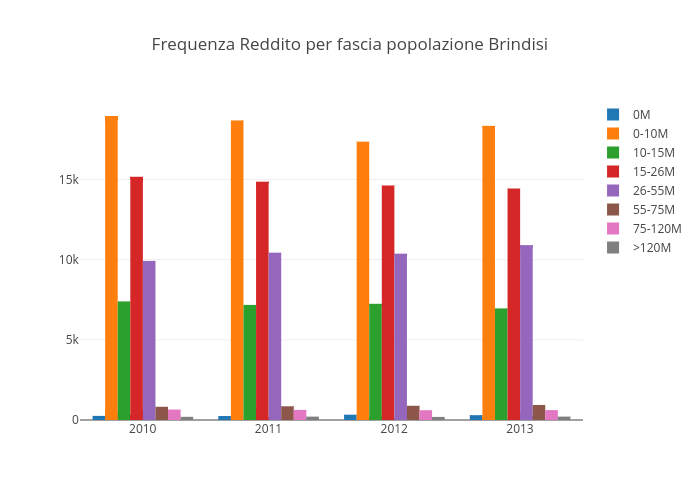

In [19]:
reddito_path = 'imgs/reddito_br.png'
py_on.image.save_as(fig, filename=reddito_path)
from IPython.display import Image
Image(reddito_path)

## Analisi Nazionale Costi Servizi

In [165]:
df_sose['ANNO'] = df_sose.ANNO.astype(object)

In [173]:
grouped_regions = df_sose.groupby(['Regione'])

In [174]:
sum_grouped_regions = grouped_regions.sum()

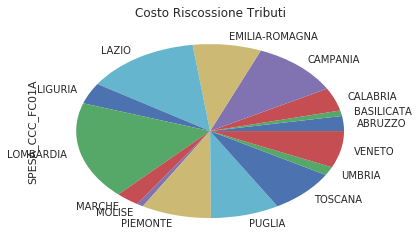

In [186]:
sum_grouped_regions['SPESA_CCC_FC01A'].plot(kind='pie',title='Costo Riscossione Tributi')

In [190]:
sum_grouped_regions['SPESA_CCC_FC01A']

data = [
    go.Pie(labels=sum_grouped_regions.index, values = sum_grouped_regions['SPESA_CCC_FC01A'])
]

layout = go.Layout(
    title='Costo Riscossione Tributi per Regione'
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

In [188]:
sum_grouped_regions.index

Index(['ABRUZZO', 'BASILICATA', 'CALABRIA', 'CAMPANIA', 'EMILIA-ROMAGNA',
       'LAZIO', 'LIGURIA', 'LOMBARDIA', 'MARCHE', 'MOLISE', 'PIEMONTE',
       'PUGLIA', 'TOSCANA', 'UMBRIA', 'VENETO'],
      dtype='object', name='Regione')

## Analisi Regioni

In [44]:
regioni = [r for r in set(df_sose.Regione) if type(r) is str]
regioni.sort()
regioni

['ABRUZZO',
 'BASILICATA',
 'CALABRIA',
 'CAMPANIA',
 'EMILIA-ROMAGNA',
 'LAZIO',
 'LIGURIA',
 'LOMBARDIA',
 'MARCHE',
 'MOLISE',
 'PIEMONTE',
 'PUGLIA',
 'TOSCANA',
 'UMBRIA',
 'VENETO']

In [91]:
regione = regioni_l[5]

In [49]:
df_regione = df_sose[df_sose['Regione'] == regione]
df_regione.shape

(1512, 88)

In [52]:
df_regione.columns

Index(['ANNO', 'COMUNE_CAT_COD', 'SPESA_CCC_FC01A', 'TOT_SPESA_CCC_FC01A',
       'SPESA_CCC_FC01B', 'TOT_SPESA_CCC_FC01B', 'SPESA_CCC_FC01C',
       'TOT_SPESA_CCC_FC01C', 'SPESA_CCC_FC01D', 'TOT_SPESA_CCC_FC01D',
       'SPESA_CCC_FC02U', 'TOT_SPESA_CCC_FC02U', 'SPESA_CCC_FC03U',
       'TOT_SPESA_CCC_FC03U', 'SPESA_CCC_FC04A', 'TOT_SPESA_CCC_FC04A',
       'SPESA_CCC_FC04B', 'TOT_SPESA_CCC_FC04B', 'SPESA_CCC_FC05A',
       'TOT_SPESA_CCC_FC05A', 'SPESA_CCC_FC05B', 'TOT_SPESA_CCC_FC05B',
       'SPESA_CCC_FC06A', 'TOT_SPESA_CCC_FC06A', 'SPESA_CCC_FC06B',
       'TOT_SPESA_CCC_FC06B', 'SPESA_CCC_tot', 'TOT_SPESA_CCC_tot',
       'Codice Nazionale', 'Denominazione Italiana', 'Codice Catastale',
       'Ufficio Catasto Terreni', 'Ufficio Catasto Fabbricati',
       'Codice Conservatoria', 'Addizionale comunale dovuta Ammontare',
       'Addizionale comunale dovuta Frequenza',
       'Addizionale regionale dovuta Ammontare',
       'Addizionale regionale dovuta Frequenza', 'Anno di impos

### Entrate Tributarie

In [140]:
grouped_provincia = df_regione.groupby(['Provincia', 'ANNO'])['SPESA_CCC_FC01A', 'tot_contribuenti']

In [147]:
grouped_provincia.mean().add_prefix('mean_').reset_index()

,Provincia,ANNO,mean_SPESA_CCC_FC01A,mean_tot_contribuenti
0,FR,2010,44434.315385,3506.769231
1,FR,2011,40553.153846,3480.901099
2,FR,2012,42754.267231,3449.923077
3,FR,2013,71267.484462,3412.725275
4,LT,2010,130892.151515,11029.090909
5,LT,2011,138349.103030,11079.000000
6,LT,2012,128407.420273,10958.484848
7,LT,2013,177257.168879,11000.636364
8,RI,2010,22038.445205,1464.602740
9,RI,2011,20179.168493,1463.726027


In [101]:
tribute_income = grouped_provincia.sum(numeric_only=True)

In [128]:
tribute_income['tax_per_citizen'] = tribute_income['SPESA_CCC_FC01A'] / tribute_income['tot_contribuenti']

In [129]:
tribute_income.loc['FR','tax_per_citizen'].values

array([ 12.67101211,  11.65018847,  12.39281754,  20.88286596])

In [130]:
tribute_income.index.levels[1]

Int64Index([2010, 2011, 2012, 2013], dtype='int64', name='ANNO')

In [131]:
data = []
for pr in tribute_income.index.levels[0]:
    years = tribute_income.index.levels[1]
    y = tribute_income.loc[pr,'tax_per_citizen'].values
    data.append(bar__chart_template(years, y, pr))    

In [148]:
layout = go.Layout(
    title='Entrate Tributarie per Cittadino nelle province del Lazio'
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

In [150]:
tribute_income

SPESA_CCC_FC01A  tot_contribuenti  tribute_citizen  \
Provincia ANNO                                                       
FR        2010     4.043523e+06          319116.0        12.671012   
          2011     3.690337e+06          316762.0        11.650188   
          2012     3.890638e+06          313943.0        12.392818   
          2013     6.485341e+06          310558.0        20.882866   
LT        2010     4.319441e+06          363960.0        11.867900   
          2011     4.565520e+06          365607.0        12.487508   
          2012     4.237445e+06          361630.0        11.717625   
          2013     5.849487e+06          363021.0        16.113356   
RI        2010     1.608806e+06          106916.0        15.047388   
          2011     1.473079e+06          106852.0        13.786165   
          2012     1.597654e+06          105641.0        15.123430   
          2013     2.842631e+06          104555.0        27.187901   
RM        2010     6.684438e+07         2786117.0        23.991951   
          2011     6.808271e+07         2765484.0        24.618732   
          2012     6.504827e+07         2767119.0        23.507579   
          2013     5.495166e+07         2772739.0        19.818549   
VT        2010     3.624147e+06          216122.0        16.768987   
          2011     3.942796e+06          216054.0        18.249124   
          2012     3.751514e+06          213692.0        17.555707   
          2013     5.952548e+06          213044.0        27.940464   

                tax_per_citizen  
Provincia ANNO                   
FR        2010        12.671012  
          2011        11.650188  
          2012        12.392818  
          2013        20.882866  
LT        2010        11.867900  
          2011        12.487508  
          2012        11.717625  
          2013        16.113356  
RI        2010        15.047388  
          2011        13.786165  
          2012        15.123430  
          2013        27.187901  
RM        2010        23.991951  
          2011        24.618732  
          2012        23.507579  
          2013        19.818549  
VT        2010        16.768987  
          2011        18.249124  
          2012        17.555707  
          2013        27.940464

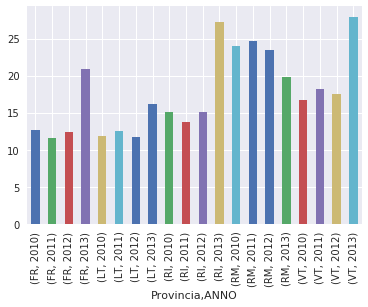

In [160]:
tribute_income.tax_per_citizen.plot(kind='bar', stacked=True)